<a href="https://colab.research.google.com/github/lunaB/AI-Study/blob/master/2_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

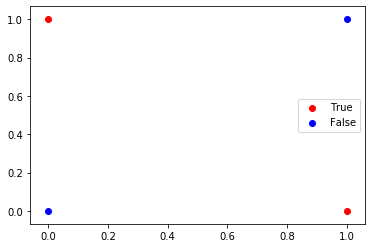

0 0.28662294149398804
300 1.4067519771288062e-07
600 0.0
900 0.0
1200 0.0
1500 0.0
1800 0.0
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [1.]
 [1.]
 [0.]]


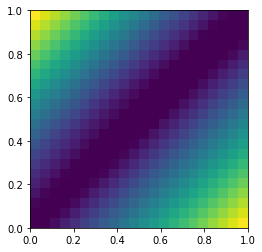

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)

# X와 Y dtype은 무조건 float32이여야 하는 것 같다.
x = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y = np.array([[0],[1],[1],[0]], dtype=np.float32)

# 목표 그래프
plt.scatter(x.T[0,1:3],x.T[1,1:3], c='r')
plt.scatter(x.T[0,0::3],x.T[1,0::3], c='b')
plt.legend(['True', 'False'])
plt.show()

# 모델 설정
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.ReLU(),
)

loss_func = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for i in range(2001):

    inputs = torch.from_numpy(x)
    targets = torch.from_numpy(y)

    outputs = model(inputs)

    loss = loss_func(outputs, targets)
    
    optim.zero_grad()
    loss.backward()
    optim.step()

    if i%300 == 0:
        print(i, loss.item())

print(x)
print(model(torch.from_numpy(x)).detach().numpy())

# 시각화

# ax (22,), ay (22,)
ax = np.arange(0, 1.1, 0.05)
ay = np.arange(0, 1.1, 0.05)

# ax, ay로 만들수 있는 zip 쌍을 만들어줌 tx (22, 22), ty (22, 22)
tx, ty = np.meshgrid(ax, ay)

# 코드길이 줄이는 용도 22*22
rtmp = len(ax)*len(ay)

# tx (22, 22), ty (22, 22) 사이즈의 배열을 (22*22) 사이즈로 편뒤 zip으로 학습시의 [[x, y], [...], ...] 모양으로 만들어주고 실행시킨뒤 다시 ax, ay 사이즈인 (22, 22)로 되돌린다.
grid = model(torch.from_numpy(np.array(list(zip(tx.reshape(rtmp), ty.reshape(rtmp))), dtype=np.float32))).detach().numpy().reshape(len(ax), len(ay))

# origin='lower'는 y축이 0부터 최대값까지 올라가게 바꾸어준다. extent는 image크기에 상관없이 눈끔을 그려준다.
plt.imshow(grid, interpolation='nearest', origin='lower', extent=[0,1,0,1])
plt.show()

In [0]:
# 실패

# dx, dy = 0.1, 0.1

# x_a = np.arange(0, 1.1, dx)
# y_a = np.arange(0, 1.1, dy)
# X, Y = np.meshgrid(x_a, y_a)

# extent = np.min(x), np.max(x), np.min(y), np.max(y)
# # fig = plt.figure(frameon=False)
# # Z1 = np.add.outer(range(8), range(8)) % 2  # chessboard
# # im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', extent=extent)
# Z2 = model(torch.from_numpy(np.array(list(zip(X.reshape(len(X)**2), Y.reshape(len(Y)**2))), dtype=np.float32))).detach().numpy()
# im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear', extent=extent)
# plt.show()